In [1]:
# 파파고 api 
import os
import sys
import urllib.request
import requests
from pprint import pprint
import re

#  google 번역
import googletrans
from google.cloud import translate_v2 as translate

# db 연결 
import pymysql 
import jaydebeapi

#time 
import time 

# 문자열 중복제거 
from collections import OrderedDict


# DB 약어 
import pandas as pd 
import numpy as np 


# 딕셔너리 피클로 저장 
import pickle

In [2]:
# 마리아db 연결 
conn = pymysql.connect(host = '127.0.0.1' , user = 'root' , password = '1234' , db = 'test_db', charset='utf8' )
cur = conn.cursor()

# 파파고 api 사용 
papago_client_id = 'HkxMHW9hezSa69Iwm2BQ'
papagp_clientSecret = '1ZgqWsFhuS'

# python google translate 라이브러리
translator = googletrans.Translator()



In [3]:
# 파파고 api번역 사용 기본 

client_id = papago_client_id # 개발자센터에서 발급받은 Client ID 값
client_secret = papagp_clientSecret # 개발자센터에서 발급받은 Client Secret 값

encText = urllib.parse.quote("반갑습니다")
data = "source=ko&target=en&text=" + encText
url = "https://openapi.naver.com/v1/papago/n2mt"

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
    
else:
    print("Error Code:" + rescode)

{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Nice to meet you.","engineType":"PRETRANS","pivot":null,"dict":null,"tarDict":null},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}


In [4]:
# 파파고 api 간단한 함수 작성2 

def papago_translate(text):
    data = {'text' : text,
            'source' : 'ko',
            'target': 'en'}

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-Naver-Client-Id":client_id,
              "X-Naver-Client-Secret":client_secret}

    response = requests.post(url, headers=header, data= data)
    rescode = response.status_code

    if(rescode==200):        
        t_data = response.json()
        trans_data_papa = t_data['message']['result']['translatedText']        
        
        
    else:
        print("Error Code:" , rescode)
        
        
    return trans_data_papa  # 이함수 안에있는 변수 trans_data_papa의 속성 및 값을 함수에 부여한다.  

print(papago_translate('파파고를 사용해봅시다.'))
print(type(papago_translate('파파고를 사용해봅시다.')))


Let's use a Papago.
<class 'str'>


In [ ]:
# 구글 정식 api 유료 사용  
def google_v2(text) : 

    os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'key.json'

    client = translate.Client()
    result = client.translate(text , target_language='en')
    result = result['tranlatedText']
    return result 
    
google_v2("반갑습니다.")




In [58]:
# 정규식 테스트 , 특수문자 제거 
str2 = "Nice Goodidea!!!!!!, @_@;;;;; "
test_rex = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·;_]', '', str2)
print(test_rex)

# 소문자 변경 
test_lower = test_rex.lower()
print(test_lower)



Nice Goodidea  
nice goodidea  


In [61]:
# 번역
# 1. 파이썬 구글번역 라이브러리 

str1 = "전라남도교육청 전라남도고흥교육지원청_폐지학교 현황"

test01 = translator.translate('한국보건의료인국가시험원', dest="en")
print("###google translate 사용 ###")
print(test01.text)
test01


# 2. papago api 사용 
print("### papago 사용 ###")
test02 = papago_translate(str1)
print(test02)


###google translate 사용 ###
Korea National Health and Medical Examination Institute
### papago 사용 ###
Jeollanam-do Office of Education of the Jeollanam-do Goheung Education Support Office_The status of abandoned schools


In [4]:
#sql 
#test sql 
select_data_name = "select ID, data_name as kor from data_basic_info"
table = 'data_key'

# MANAGE_PHYSICAL_TABLE select sql
select_logical_table_korean = "select ID, LOGICAL_TABLE_KOREAN as kor from MANAGE_PHYSICAL_TABLE where DATA_BASIC_ID in (select id from DATA_BASIC_INFO where COLLECT_SITE_ID=2 and IS_COLLECT_YN='Y') and logical_table_english like 'DATA_TMP_%'"
# MANAGE_PHYSICAL_COLUMN select sql
select_logical_column_korean = "select ID, LOGICAL_COLUMN_KOREAN as kor FROM MANAGE_PHYSICAL_COLUMN WHERE DATA_PHYSICAL_ID IN (SELECT ID FROM MANAGE_PHYSICAL_TABLE WHERE DATA_BASIC_ID IN (SELECT ID FROM DATA_BASIC_INFO WHERE COLLECT_SITE_ID='2')) AND LOGICAL_COLUMN_ENGLISH LIKE 'DATA_COL_%'"


In [5]:
# test data_basic_info 변경 
# table은 업데이트를 실행할 테이블을 말함 , 번역 후 붙여넣기용 테이블 

cur.execute(select_data_name)
select_data = cur.fetchall()
print(select_data[0:10])
print(type(select_data[0]))

((1, '100년 미래교육보고서 '), (2, '2100-01-01 환경보고'), (3, '2010-01'), (4, '2위 대회'), (12, '전라남도교육청 전라남도고흥교육지원청_폐지학교 현황'), (4001, '대전광역시교육청 공익법인현황'), (4002, '대전광역시교육청_학원 및 교습소 등록 현황'), (4003, '대전광역시교육청_다문화교육 정책학교 현황'), (4004, '부산광역시교육청_유치원 운영 형태'), (4006, '대구광역시 서구_비원도서관 대출순위'))
<class 'tuple'>


In [6]:
# CSV 로드후 딕트 타입 사용하기 피클로 하나의 객체로 파일로 저장
df = pd.read_csv('sampledb.csv' , header=None)
dict_db = df.set_index(0).T.to_dict('records')
dict_db

C:\Users\yoonsub\AppData\Local\Temp\ipykernel_14828\1380962895.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_db = df.set_index(0).T.to_dict('records')


[{'korea institute industrial technology evaluation management support project information': 'KEITPROINFO',
  'central radio management office ministry science technology information communication': 'CRMS',
  'ministry science technology information communication postal service headquarters': 'MSIT',
  'incheon metropolitan city yeonsugu facility safety management corporation': 'YSFSMC',
  'korea electric power international atomic energy graduate university': 'KINGS',
  'institute land infrastructure transport science technology promotion': 'KAIA',
  'incheon metropolitan city gyeyanggu facility management corporation': 'GYSISEOL',
  'waterworks business headquarters customer information system': 'WBHCUINFOSYS',
  'seoul olympic commemorative national sports promotion agency': 'KSPO',
  'seoul metropolitan area landfill site management corporation': 'SLC',
  'korea industrial technology evaluation management institute': 'KEIT',
  'jeju special selfgoverning province development corpor

In [67]:
data = {'cyber environment practical training' : 'CEPT' , 
        ' cyber environment practical training ' : 'CEPT' , 
        'national housing price trend survey' : 'house price' , 
        'korea national health medical examination institute' : 'KUKSIWON',  
        'korea national health service personnel examination center': 'KUKSIWON',
         'korea national examination center health medical professionals' : 'KUKSIWON',
        'korea national health medical professional examination center' : 'KUKSIWON',
        'korea national examination institute health medical professionals' :  'KUKSIWON',
        'korea environmental industry  technology institute' : 'KEITI' ,
        'jeollanamdo yeosu city citizen passenger' : '' ,
        'top 20 major injuries outpatient department' : '20 injuries' ,
        'national housing price trend survey' : 'house price' , 
    'korea institute industrial technology evaluation management support project information': 'KEITPROINFO',
    'sanitary safety standard certification registration information network' : 'SCRIN',
    'recycling system for electrical electronic products automobiles' : 'RSEPA' , 
  'central radio management office ministry science technology information communication': 'CRMS',
  'ministry science technology information communication postal service headquarters': 'MSIT',
  'incheon metropolitan city yeonsugu facility safety management corporation': 'YSFSMC',
  'korea electric power international atomic energy graduate university': 'KINGS',
  'institute land infrastructure transport science technology promotion': 'KAIA',
  'incheon metropolitan city gyeyanggu facility management corporation': 'GYSISEOL',
  'waterworks business headquarters customer information system': 'WBHCUINFOS',
  'seoul olympic commemorative national sports promotion agency': 'KSPO',
  'seoul metropolitan area landfill site management corporation': 'SLC',
  'korea industrial technology evaluation management institute': 'KEIT',
  'jeju special selfgoverning province development corporation': 'JPDC',
  'daejeon metropolitan city facility management corporation': 'DJSISEOL',
  'administrative central city construction administration': 'NAACC',
  'medical institution evaluation certification institute': 'KOIHA',
  'international plant quarantine certification institute': 'IPAB',
  'korea construction equipment safety management agency': 'KCESI',
  'korea youth counseling welfare development institute': 'KYCI',
  'jeju special selfgoverning province office education': 'JJE',
  'gwangju metropolitan city corporation housing status': 'GMCC',  
  'sejong special selfgoverning city office education': 'SJE',
  'korea senior human resources development institute': 'KORDI',  
  'korea environmental industry technology institute': 'KEITI',     
                   
  'uijeongbu city facilities management corporation': 'USISIUL',
  'korea gender equality education promotion agency': 'KIGEPE',
  'seoul seodaemungu urban management corporation': 'SSCMC',
  'korea vocational competency research institute': 'KRIVET',
  'korea maritime transportation safety authority': 'KOMSA',
  'korea health welfare human resources institute': 'KOHI',
  'korea craft design culture promotion institute': 'KCDF',
  'national forest science academy korea service': 'SKFS',
  'gwangju metropolitan city railway corporation': 'GRTC',
  'daejeon metropolitan city railway corporation': 'DJTC',
  'yangsan city facility management corporation': 'YSSISIUL',
        'national lifelong education promotion institute' : 'NILE' , 
         'national lifelong education promotion agency': 'NILE',
  'korea health promotion development institute': 'KHEALTH',
  'korea energy technology evaluation institute': 'KETEP',
  'korea broadcast advertising promotion agency': 'KOBACO',
  'donghae city facilities management corporation' : 'DHSISUL',
  'donghae city facility management corporation': 'DHSISUL',
  'daegu metropolitan rapid transit corporation': 'DTRO',
  'cheonan city facility management corporation': 'CFMC',
  'small business market promotion corporation': 'SEMAS',
  'jeonju city facility management corporation': 'JJSS',
  'icheon city facility management corporation': '2000FMC',
  'construction workers mutual aid association': 'CWMA',
  'wonju city facility management corporation': 'WFMC',
  'korea veterans welfare medical corporation': 'KVWMC',
        'korea veterans welfare medical service' : 'KVWMC',
  'korea test institute industrial technology': 'KTL',
  'health insurance review assessment service': 'HIRA',
  'ganghwagun facility management corporation': 'GHFMC',
  'defense acquisition program administration': 'DSPA',
  'daejeon metropolitan city office education': 'DJE',
  'small medium venture business corporation': 'KOSMES',
  'korea social security information service': 'SSIS',
  'incheon international airport corporation': 'ICAP',
  'human resources development service korea': 'HRDK',
  'gangseogu facility management corporation': 'GFMC',
  'estimated contribution information system': 'ECIS',
  'small medium venture business department': 'MSS',
  'korea sports industry development co ltd': 'KSPONCO',
  'korea social enterprise promotion agency': 'KSEPA',
  'korea fire industry technology institute': 'KFI',
  'korea centers disease control prevention': 'KDCA',
  'jongnogu facility management corporation': 'IJONGNO',
  'daegu metropolitan office education city': 'DGE',
  'busan regional industrial complex spowon': 'BSSPO1',
  'private school teachers pension service': 'TP',
  'ministry public administration security': 'MOIS',
  'ministry agriculture food rural affairs': 'MAFRA',
  'korea occupational safety health agency': 'KOSHA',
        'korea occupational safety health corporation' : 'KOSHA' , 
  'korea educational development institute': 'KEDI',
  'ministry land infrastructure transport': 'MOLIT',
  'korea tradeinvestment promotion agency': 'KOTRA',
  'korea international cooperation agency': 'KOICA',
  'korea electric power technology co ltd': 'KEPCOENC',
  'korea association university education': 'KCUE',
  'anticorruption civil rights commission': 'ACRC',
  'national health insurance corporation': 'NHIS',
   'korea transportation safety corporations'   : 'KOTSA' , 
  'korea transportation safety authority': 'KOTSA',
  'korea mine receipt mining corporation': 'KOMIR',
  'korea forest welfare promotion agency': 'FOWI',
  'korea curriculum evaluation institute': 'KICE',
  'incheon metropolitan office education': 'ICE',
  'gwangju metropolitan office education': 'GEN',
  'daejeon metropolitan office education': 'DJE',
  'korea womens rights promotion agency': 'KWRPA',
  'korea national oil management agency': 'KPETRO',
  'korea industrial complex corporation': 'KICOX',
  'korea employment information service': 'KEIS',
  'korea data industry promotion agency': 'KDATA',
  'gyeonggi provincial office education': 'GOE',
  'gimhae urban development corporation': 'GHDC',
  'defense technology quality institute': 'DTAQ',
  'ulsan metropolitan city corporation': 'UMCA',
  'seoul metropolitan office education': 'SEN',
  'national museum cultural foundation': 'NMF',
  'korean cultural information service': 'KCISA',
  'korea financial information service': 'KPFIS',
  'korea electrical safety corporation': 'KESCO',
  'jeju special selfgoverning province': 'JEJU',
  'housing urban guarantee corporation': 'KHUG',
  'daegu metropolitan office education': 'DGE',
  'busan metropolitan office education': 'PEN',
          'result customer satisfaction level': 'client satisfaction',            
  'post office logistics support team': 'POLA',
  'national research foundation korea': 'NRF',
  'ministry patriots veterans affairs': 'MPVA',
  'korea university education council': 'KCUE',
  'korea land information corporation': 'LX',
  'korea institute science technology': 'KIST',
  'korea district heating corporation': 'KDHC',
  'korea cultural heritage foundation': 'CHF',
  'korea ceramic technology institute': 'KICET',
  'korea asset management corporation': 'KAMCO',
  'incheon transportation corporation': 'ICTR',
  'gyeonggi housing urban corporation': 'GH',
  'goyang city management corporation': 'GYS',
  'daejeon transportation corporation': 'DJTC',
  'chungcheongnamdo office education ': 'CNE',
  'chungcheongbuk do office education': 'CBE',
  'sejong special selfgoverning city': 'SJ',
  'korea water resources corporation': 'KWATER',
  'korea rural community corporation': 'KOSIS',
  'korea railroad research institute': 'KRRI',
  'korea housing finance corporation': 'HF',
  'korea elevator safety corporation': 'KOELSA',
  'korea credit guarantee foundation': 'KOREG',
  'homeland safety management agency': 'KAILS',
  'gyeongnam development corporation': 'GNDC',
  'chungcheongbukdo office education': 'CBE',
  'waterworks business headquarters': 'WBH',
  'seoul transportation corporation': 'SMETRO',
  'rural development administration': 'RDA',
  'military manpower administration': 'MMA',
  'korea hydro  nuclear power co ltd ltd' : 'KHNP',
  'korea hydro  nuclear power co ltd' : 'KHNP',
  'korea hydro nuclear power co ltd': 'KHNP',
        'hydro nuclear power co ltd': 'KHNP',
        
  'korea gas technology corporation': 'KOGAS',
  'korea employment agency disabled': 'KEAD',
  'korea electric power corporation': 'KEPCO',
  'gyeongsangbukdo office education': 'GBE',
  'cultural heritage administration': 'CHA',
  'busan transportation corporation': 'HUMETRO',
  'basic science research institute': 'IBS',
  'public officials private schools': 'POPS',
  'seoul housing urban corporation': 'ISH',
  'ministry gender equality family': 'MOGEF',
  'korea labor welfare corporation': 'KCOMWEL',
  'korea forestry promotion agency': 'KOFPI',
  'korea energy research institute': 'KIER',
  'korea culture tourism institute': 'KCTI',
  'korea communications commission': 'KCC',
  'incheon environment corporation': 'ECOI',
  'gwangju environment corporation': 'KECO',
  'changwon facilities corporation': 'CWSISUL',
  'yeosu gwangyang port authority': 'YGPA',
  'ministry trade industry energy': 'MOTIE',
  'marine environment corporation': 'KOEM',
  'korea national oil corporation': 'KNOC',
  'korea legal research institute': 'KLRL',
  'korea land housing corporation': 'LH',
  'korea internet security agency': 'KISA',
  'korea arboretum garden manager': 'KOAGI',
  'incheon facilities corporation': 'INSISEOL',
  'national tax service business': 'NTS',
  'national railroad corporation': 'KNR',
  'korea environment corporation': 'KECO',
  'korea electric power exchange': 'KPX',
  'gyeonggi tourism organization': 'GGTO',
  'deposit insurance corporation': 'KDIC',
  'seoul facilities corporation': 'SSISUL',
  'korea southeast power co ltd': 'KOEN',
  'korea social welfare council': 'KSWC',
  'korea scholarship foundation': 'KOSAF',
  'korea expressway corporation': 'EX',
  'kimdaejung convention center': 'KDJCT',
  'jeollanamdo office education': 'JBE',
  'daejeon tourism organization': 'DIME',
  'busan facilities corporation': 'BISCO',
  'overseas koreans foundation': 'OKF',
  'ministry science technology': 'MST',
  'korea southern power co ltd': 'KOSPO',
  'korea organ donation agency': 'KODA',
  'korea eastwest power co ltd': 'EWP',
  'korea credit guarantee fund': 'KODIT',
  'ulsan facility corporation': 'UIC',
  'supreme prosecutors office': 'SPO',
  'small medium business bank': 'IBK',
  'national institute ecology': 'NIE',
  'korea western power co ltd': 'IWEST',
  'korea railroad corporation': 'KORAIL',
  'korea airports corporation': 'KAC',
  'grand korea leisure co ltd': 'GRANDKR',
  'busan tourism organization': 'BTO',
  'technology guarantee fund': 'KIBO',
  'national park corporation': 'KNPS',
  'ministry veterans affairs': 'MPVA',
  'ministry strategy finance': 'MOEF',
  'ministry oceans fisheries': 'MOF',
  'ministry national defense': 'MND',
  'ministry employment labor': 'MOEL',
  'korea minting corporation': 'KOMSCO',
  'jeju tourism organization': 'IJTO',
  'incheon metropolitan city': 'IC',
  'hwaseong city corporation': 'HSUCO',
  'gwangju metropolitan city': 'GJ',
  'gwacheon city corporation': 'GCUC',
  'daejeon metropolitan city': 'DJ',
  'viewers media foundation': 'KCMF',
  'siheung city corporation': 'SHSI',
  'nuclear safety committee': 'NSSC',
  'national pension service': 'NPS',
  'national aviation museum': 'NAM',
  'ministry foreign affairs': 'MOFA',
  'korea real estate agency': 'REB',
  'korea real estate institute' : 'REB', 
  'korea energy corporation': 'KEA',
  'incheon city corporation': 'IH',
  'yongin city corporation': 'YUC',
        
        'academic credit banking information disclosure system institutional' : 'academic bank' ,
        'academic credit banking information disclosure system' : 'academic bank' ,
        'credit bank system information disclosure' : 'academic bank' ,
        'credit banking system information' : 'academic bank',
        'credit bank system information' : 'academic bank',
        'subscribers' : 'SUB' , 
        'youth education management' : 'YEM' , 
        'youth education support' : 'YES' , 
        'livestock manure electronic handover management system' :'LEHMS',
        'livestock excreta electronic handover management system' : 'LEHMS' ,
        'technology institute information disclosure system' : 'TIIDS' , 
        'rehabilitation medicine' : 'RM',      
        
  'ulsan metropolitan city': 'US',
  'ministry health welfare': 'MOHW',
  'jeju energy corporation': 'JEJUEC',
  'daegu metropolitan city': 'DG',
  'busan metropolitan city': 'BS',
  'suwon city corporation': 'SUWONUDC',
  'road traffic authority': 'KOROAD',
  'peoples finance agency': 'KINFA',
  'national police agency': 'KNPA',
  'korea press foundation': 'KPF',
  'korea development bank': 'KDB',
        'korea mine corporations' : 'KOMIR' , 
  'korea coal corporation': 'KOCOAL',
  'ansan city corporation': 'ANSANUC',
  'korea gas corporation': 'KOGAS',
  'korea consumer agency': 'KCA',
  'ministry environment': 'ME',
  'ministry culture sports tourism' : 'MCST' , 
  'korea organ donation': 'KODA',
  'korea forest service': 'KFS',
  'hr innovation office': 'MPM',
  'statistical office': 'KOSTAT',
  'ministry education': 'MOE',
  'education ministry': 'MOE',
  'department defense': 'MND',
  'chungcheong bukdo': 'CCBD',
  'ministry justice': 'MOJ',
  'korean red cross': 'REDCROSS',
  'korea foundation': 'KF',
  'kepco kdn co ltd': 'KDN',
  'chungcheongnamdo': 'CCND',
  'chungcheongbukdo': 'CCBD',
  'korea job world': 'KJW',
  'gyeongsangnamdo': 'GSND',
  'gyeongsangbukdo': 'GSBD',
  'customs office': 'KCS',
  'patent office': 'KIPO',
  'jeollabuk do': 'JLBD',
  'jeollanamdo': 'JLND',
  'jeollabukdo': 'JLBD',
  'coast guard': 'KCG',
  'gyeonggido': 'GGD',
  'gangwondo': 'GWD',
  'sr co ltd': 'SR',
  'gwangju': 'GJ',
  'daejeon': 'DJ',
  'seoul': 'SU',
  'daegu': 'DG',
  'busan': 'BS',
  'business' : 'BIZ' ,
  'analysis' : 'ANLY' ,
  'aviation' : 'AV', 
  'accommodation' : 'ACCOMM' ,      
        'accumulated' : 'ACCUM' , 
        'accumulation' : 'ACCUM' , 
        
    'agricultural' : 'AGRIC' , 
  'informationnational': 'IFNL',
  'transportation': 'TR',
  'infrastructure': 'INFSTR',
        'increased' : 'INCRE',
        'increase' : 'INCRE',
  'administrative': 'ADS',
  'incheon': 'IC',
  'establishments': 'FAR',
  'administration': 'ADM',
  'environmental': 'EVM',
  'international': 'INTL',
  'manufacturing': 'MNFC',
  'statusgwangju': 'STTGJ',
         'representative' : 'REPRE' , 
        'factory' : 'FT',       
        'universities' : 'UNIV' ,
        'university' : 'UNIV',
        'conversion':'CONV',
        'execution' : 'EC' , 
        'han river flood control center' : 'HFC',
        'overthecounter' : 'OTC',
        'general social welfare' : 'GSF',
        'volumebased wasted disposal bags' : 'garbage bag',
        'volumebased wasted disposal bag' : 'garbage bag',
        'average' : 'AVG' ,
        'qualification': 'QL',
        'quarterly' : 'QTS' , 
        'test takers' : 'EXAM' , 
        'broadcast' : 'BRC',
        'broadcasting': 'BRC',
        'comprehensive' : 'CMPH' , 
        'production' : 'PROD' ,
        'products' : 'PROD' , 
        'product' : 'PROD' , 
         'company' : 'CO',
          'completed' : 'COM',
          'complete' : 'COM',
            'grade' : 'GR' ,
            'veterans welfare ' : 'VW' ,  
                'rental' : 'RENT' ,
                'rentals' : 'RENT' ,
  'certification': 'CERT',
  'organizations': 'ORG',
  'investigation': 'INVS',
  'communication': 'COMMU',
                'community' : 'COMMU',
  'professionals': 'PRO',
   'professional': 'PRO',
  'registrations': 'REG',
  'registration': 'REG',
        'individual' : 'INDIV' , 
  'installation': 'INST',
  'construction': 'CON',
  'headquarters': 'HQ',
      

  'corporations': 'CORP',
  'occupational': 'OCCUP',
  'organization': 'ORG',             
  'applications': 'APP',
  'application': 'APP',
  'applicants' : 'APP' , 
  'government'  : 'GOV' ,    
  'governments'  : 'GOV' ,            
  'information': 'INFO',
  'transaction': 'TA',
  'environment': 'EVM',
  'development': 'DE',
  'performance': 'PFM',
  'enforcement': 'ENFRC',
  'examination': 'EM',
  'discharging': 'DSCH',
  'dischargers': 'DSCH',
  'reclamation': 'RCL',
  'cooperation': 'CORP',
  'acquisition': 'AQ',
  'facilities': 'FC',
  'statistics': 'STTS',
  'foundation': 'BASE',
  'seongnamsi': 'SN',
  'industrial': 'INDST',
  'inspection': 'INSPC',
  'hydrokorea': 'HYDKR',
  'technology': 'TECH',
  'electronic': 'ELEC',
        'electricity' : 'ELEC', 
        'electrical' : 'ELEC', 
  'processing': 'PRC',
  'busanbusan': 'BS',
  'department': 'DEPT',
  'registered': 'RGST',
                   'railways' : 'rail',
                   'railway' : 'rail' , 
        
  'generation': 'GEN',
  'commercial': 'CMR',
  'arrangment' : 'ARR' , 
  'automobile': 'AUTOM',
  'largescale': 'Lscale',
  'employment': 'EMP',
  'evaluation': 'EVAL',
  'capability': 'CAP',
  'education': 'EDU',
  'authority': 'AUTH',
  'resources': 'RSRC',
  'companies': 'COMP',
  'operation': 'OPR',
  'buildings': 'BLDG',
  'transport': 'TR',
  'apartment': 'APT',
  'guarantee': 'GUARNT',
  'discharge': 'DCH',
  'employees': 'EMP',
  'equipment': 'EQUIP',
  'pollution': 'POL',
  'promotion': 'PROMO',
  'accidents': 'AC',
        'automatic' : 'AUTO',
  'childrens': 'CHILD',
  'personnel': 'BI',
  'passenger': 'PSNGR',
  'insurance': 'INS',
  'emergency': 'EMGC',
  'national': 'NL',
  'facility': 'FC',
  'industry': 'IND',
  'taxation': 'TAX',
  'disabled': 'DSABL',
  'electric': 'ELEC',
  'hospital': 'HOSP',
  'dalseogu': 'BLDG',
  'building': 'BUILDIN',
  'handover': 'HNDV',
  'charging': 'CH',
  'gunsansi': 'GSBD',
  'regional': 'RGN',
  'accident': 'AC',
  'capacity': 'CAP',
  'medical': 'MD',
  'traffic': 'TRFC',
  'vehicle': 'CAR',
  'quality': 'QL',
  'support': 'SUPP',
  'pension': 'PENS',
  'payment': 'PMT',
  'project': 'PJT',
  'private': 'PRIV',
  'subject': 'SB',
  'stations' : 'STN' , 
  'station' : 'STN' , 
  'control': 'CR',
  'contents' : 'CONT' ,
  'content' : 'CONT' ,
  'cokorea': 'COKR',
                'teachers' : 'TCHR' ,
                'teacher' : 'TCHR' , 
    'trend svy' :  '',
    'trend survey' :  '',        
        
  'license': 'LCN',
  'system': '',
  'number': 'NUM',
  'police': 'PO',
  'survey': '',
  'source': 'SRC',
  'sports': 'SPO',
  'supply': 'SPL',
  'region': 'RGN',
  'korea': 'KR',
  'power': 'PW',
            'policy' : 'PO' , 
  'index': 'IDX',
  'students' : 'STUD' ,
  'student' : 'STUD' ,
  'classification' : 'CI',
  'classified' : 'CI',       
  'self governing city': '',
  'metropolitanfice': '',
  'current status': '',
  'selfgoverning': '',
  'metropolitan': '',
  'corporation': '',
  'management': '',
            'institutional' : '',                  
            'institutions': '',
            'institution': '',
            'institute': '',
  'provinces': '',
  'according to': '',
  'province': '',
  'service': '',
  'current': '',
  'allowed': '',
  'status': '',
  'market': '',
  ' city ': ' ',
  ' type ': ' ',
  ' with ': '',
  ' from ': '',
  ' data ': ' ',
  ' use ': ' ',
  ' to ': ' ',
  ' by ': ' ',
  ' s ': ' ',
  ' o ' : ' ', 
  'among': ' ',  
  ' is ' : ' ' ,
  ' a ' : ' ' ,
  ' lot ' : ' ' ,
   ' or ' : ' ',   
    'reporting' : '',
    'reports': '',
    'report': '' ,
    'targets' : '',
    'target' : '',
     'their' : '',
       ' particle ' : ' ',
       ' rate ' : ' ',
       ' joint ' : ' '} 
        
with open("dict_data.pkl", 'wb') as f:
    dict_refine_words = pickle.dump(data, f)

dict_refine_words



In [4]:
print(data)

{'cyber environment practical training': 'CEPT', ' cyber environment practical training ': 'CEPT', 'national housing price trend survey': 'house price', 'korea national health medical examination institute': 'KUKSIWON', 'korea national health service personnel examination center': 'KUKSIWON', 'korea national examination center health medical professionals': 'KUKSIWON', 'korea national health medical professional examination center': 'KUKSIWON', 'korea national examination institute health medical professionals': 'KUKSIWON', 'korea environmental industry  technology institute': 'KEITI', 'jeollanamdo yeosu city citizen passenger': '', 'top 20 major injuries outpatient department': '20 injuries', 'korea institute industrial technology evaluation management support project information': 'KEITPROINFO', 'sanitary safety standard certification registration information network': 'SCRIN', 'recycling system for electrical electronic products automobiles': 'RSEPA', 'central radio management offic

In [59]:
#1-2 개선 
delete_words = [' that ' , ' with ' , ' amount ' , ' about ', ' and ' , ' the ' , ' as ',' of ' , 
                ' by ' , ' on ' , ' for ' , ' and ' , ' an ' ,' at ' ]

with open("dict_data.pkl", 'rb') as f:
    dict_refine_words = pickle.load(f)

for data in select_data : 
    id_ = data[0] # 'id' 에러남 , 튜플 슬라이스는 정수만 가능 
    print(f'id : {id_}')
    kor = data[1].replace('_' ,' ')
    print(f'kor : {kor}')
    result = translator.translate(kor, dest='en')
    logical_eng = result.text
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    logical_eng = logical_eng.lower() # 대문자 -> 소문자 변경 
    logical_eng = logical_eng.replace('-' ,'') # seo-gu ->seogu 변경    
    
    # 중복제거 
    logical_eng = logical_eng.split(' ')
    logical_eng = list(OrderedDict.fromkeys(logical_eng))
    logical_eng = " ".join(logical_eng)


    #특정단어 혹은 전치사 삭제     
    for word in delete_words : 
        logical_eng = logical_eng.replace(word , " ")               
       
    
    logical_eng = re.sub('[^a-zA-Z]', ' ', logical_eng)  # 영어를 제외한 모두 제거 
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    

    # 회사명 약어 변경
    for j in dict_refine_words : 
        logical_eng = logical_eng.replace(j , dict_refine_words[j])       
    
     # 글자수 SQL 제약 확인 
    logical_eng = logical_eng.upper()  # 대문자로 모두 변경 
    if len(logical_eng) >= 50 : 
        logical_eng = logical_eng.split(' ')[1:9]        
        logical_eng = " ".join(logical_eng)
        
        if len(logical_eng) >= 50 : 
           logical_eng = logical_eng.split(' ')[2:8]        
           logical_eng = " ".join(logical_eng)    
    else :
        logical_eng=logical_eng      
      
    
    
    # 공백을 언더바로 변환 전처리   
    logical_eng = logical_eng.replace("\u200B", "")  # ZWSP 유니코드 삭제
    logical_eng = logical_eng.replace('    ', '')
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    logical_eng = logical_eng.replace('   ', '_') # 공백을 언더바로 변환 
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    logical_eng = logical_eng.replace('  ', '_') # 공백을 언더바로 변환 
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    logical_eng = logical_eng.replace(' ', '_') # 공백을 언더바로 변환      
    
   
    
    
    print(f'eng : {logical_eng}')
    update_sql = f"update data_basic_info set data_key = '{logical_eng}' where id='{id_}'"
    cur.execute(update_sql)
    conn.commit() # 마리아 test db에서 만 넣고 반드시 tdb사용할땐 지울것 !!!
  


NameError: name 'select_data' is not defined

In [12]:
# #2. 파파고 버전 사용 , test

# for data in select_data : 
#     id_ = data[0] 
#     print(f'id : {id_}')
#     kor = data[1].replace('_' ,' ')
#     print(f'kor : {kor}')
#     english_name = papago_translate(kor)
#     english_name = english_name.strip() # 양쪽 공백제거
#     english_name = re.sub('[^a-zA-Z]', ' ', english_name) # 영어만 제외하고 나머지는 모두 제거
#     #english_name = re.sub('[-=+,&#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·;_{}]', '', logical_eng) # 정규식 사용 특수문자 제거    
#     print(f'eng : {english_name}')    
#     update_sql = f"update data_basic_info set data_key = '{english_name}' where id='{id_}'"
#     cur.execute(update_sql)
#     conn.commit() # 마리아 test db에서 만 넣고 반드시 tdb사용할땐 지울것 !!! 
  

In [ ]:
# 1.  전치사를 전체 제거한다면...
# split '_' 단어를 나눈다. 
# 단어를 나누고 전처리 구문으로 지운다. 
# 불용어 리스트만 제거한다. 
# 다시 조합한다. 
# 2. 특정전치사 몇개만 제거한다면 ..
# replace를 몇번 반복하면 될듯...


test03 ='status_of_building_sanitation_management_business_in_cheongju_chungcheongbukdo'
test02 = 'current_status_of_heavy_oil_users_in_jincheongun_chungcheongbukdo'
test02_text = test02.split('_')
test03_text = test03.split('_')


#  'current', 'status', 'of' 등으로 분리 전치사만 제거 해야함 
re_text = [text for text in test02_text if not text in delete_words]  
re_text02 = [text for text in test03_text if not text in delete_words]  

# of 만 지움 다시 재조립 

name = ''
for i in range(0, len(re_text02)-1):
    name += f'_{re_text02[i]}' if name != '' else f'{re_text02[i]}'
    
print(name)


test02.replace('of' ,'')
print(test02)


    

In [ ]:
# 긴이름은 split 하여 set으로 중복제거 하여 나타내면 뜻은 적당히 보존하면서 많이 줄일수있을것 같다. 

test04 = 'final of final on final at final the giga break '

# 1. 중복 알파벳 삭제 - 사용불가 

# 2. 문자열을 단어별 분리 후 중복제거 
test04 = test04.split(' ') # str-> list로 변경 
test04 = set(test04)
test04 

# set은 순서가 저장되지않아 사용불가 
test05 = 'final of final on final at final the giga break '

test05 = test05.split(' ')
test05= list(OrderedDict.fromkeys(test05))
test05 = " ".join(test05)
test05



In [45]:
# 잘못된 형식 수정 
# 1 기존 영어로 번역된 문장 대문자를 모두 소문자로 변경 
# 2 모든 특수문자 제거 
# 3 기존데이터 수정코드 

select_modify_data_name = "select ID, data_key as en from data_basic_info"
cur.execute(select_modify_data_name)
select_modify_data = cur.fetchall()


print(select_modify_data[1][1]) 

JANUARY_01_2100_EVM_REPORT


In [ ]:
# 컬럼에서 숫자는 영어단어로 
# 컬럼에서 날짜또한 숫자가아닌 영어단어로 

In [13]:
# 숫자 사용 함수를 직접 만든다면 

'''
convert number to string, number range is 0-999,999,999,999 and must be integer
Created on 2012-10-31

@author: Eric

'''
import locale;

NUMBER_CONSTANT = {0:"zero ", 1:"one", 2:"two", 3:"three", 4:"four", 5:"five", 6:"six", 7:"seven",
                8:"eight", 9:"nine", 10:"ten", 11:"eleven", 12:"twelve", 13:"thirteen",
                14:"fourteen", 15:"fifteen", 16:"sixteen", 17:"seventeen", 18:"eighteen", 19:"nineteen" };
IN_HUNDRED_CONSTANT = {2:"twenty", 3:"thirty", 4:"forty", 5:"fifty", 6:"sixty", 7:"seventy", 8:"eighty", 9:"ninety"}
BASE_CONSTANT = {0:" ", 1:"hundred", 2:"thousand", 3:"million", 4:"billion"};

#supported number range is 1-n billion;
def translateNumberToEnglish(number):
    if str(number).isnumeric():
        if str(number)[0] == '0' and len(str(number)) > 1:
            return translateNumberToEnglish(int(number[1:]));
        if int(number) < 20:
            return NUMBER_CONSTANT[int(number)];
        elif int(number) < 100:
            if str(number)[1] == '0':
                return IN_HUNDRED_CONSTANT[int(str(number)[0])];
            else:
                return IN_HUNDRED_CONSTANT[int(str(number)[0])] + "-" + NUMBER_CONSTANT[int(str(number)[1])];
        else:
            locale.setlocale(locale.LC_ALL, "English_United States.1252");
            strNumber = locale.format("%d"    , number, grouping=True);
            numberArray = str(strNumber).split(",");
            stringResult = "";
            groupCount = len(numberArray) + 1;
            for groupNumber in numberArray:
                if groupCount > 1 and groupNumber[0:] != "000":
                    stringResult += str(getUnderThreeNumberString(str(groupNumber))) + " ";
                else:
                    break;
                groupCount -= 1;
                if groupCount > 1:
                    stringResult += BASE_CONSTANT[groupCount] + ",";
            endPoint = len(stringResult) - len(" hundred,");
            #return stringResult[0:endPoint];
            return stringResult;
                
    else:
        print("please input a number!");

#between 0-999
def getUnderThreeNumberString(number):
    if str(number).isnumeric() and len(number) < 4:
        if len(number) < 3:
            return translateNumberToEnglish(int(number));
        elif len(number) == 3 and number[0:] == "000":
            return " ";
        elif len(number) == 3 and number[1:] == "00":
            return NUMBER_CONSTANT[int(number[0])] + "  " + BASE_CONSTANT[1];
        else:    
            return NUMBER_CONSTANT[int(number[0])] + "  " + BASE_CONSTANT[1] + " and " + translateNumberToEnglish((number[1:]));
    else:
        print("number must below 1000");
    

def testTranslateNumberToEnglish():
       print("0: " + translateNumberToEnglish(0));
       print("9: " + translateNumberToEnglish(9));
       print("33: " + translateNumberToEnglish(33));
       print("40: " + translateNumberToEnglish(40));
       print("100: " + translateNumberToEnglish(100));
       print("103: " + translateNumberToEnglish(103));
       print("123: " + translateNumberToEnglish(123));
       print("1,121,912  " + translateNumberToEnglish(1121912));
       print("211,121,900  " + translateNumberToEnglish(211121900));
       print("11,000,000  " + translateNumberToEnglish(11000000));
       print("1,111,121,912  " + translateNumberToEnglish(111121912));
       print("2,211,121,900  " + translateNumberToEnglish(2211121900));
       print("1,111,000,000  " + translateNumberToEnglish(1111000000));

if __name__ == '__main__':
    testTranslateNumberToEnglish();

0: zero 
9: nine
33: thirty-three
40: forty
100: one  hundred 
103: one  hundred and three 
123: one  hundred and twenty-three 
1,121,912  one million,one  hundred and twenty-one thousand,nine  hundred and twelve 
211,121,900  two  hundred and eleven million,one  hundred and twenty-one thousand,nine  hundred 
11,000,000  eleven million,
1,111,121,912  one  hundred and eleven million,one  hundred and twenty-one thousand,nine  hundred and twelve 
2,211,121,900  two billion,two  hundred and eleven million,one  hundred and twenty-one thousand,nine  hundred 
1,111,000,000  one billion,one  hundred and eleven million,


C:\Users\yoonsub\AppData\Local\Temp\ipykernel_10684\1693503405.py:31: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  strNumber = locale.format("%d"    , number, grouping=True);


In [7]:
# num2words 라이브러리 사용 
# 날짜 구분필요 

In [11]:
from num2words import num2words


# 맨처음에는 접합하지 않다. 뒤에서 후처리에 필요한듯 하다. 
# 번역 후 특수문자 및 치환전이 적합한듯 싶다. 

test_str = ["got 1000 english"  , "321 life is long" ,"231 life is short " ] 
test_str02 = ["2021-01"]
 
# 여기서 전처리르 어떻게 할것인가. 

for en in test_str :         
        en = en.split(' ')   
        
        try :  
            en_first = num2words(en[0])      
            
        except :
            en = " ".join(en)
            print('처음글자가 숫자가 아닙니다. :' ,en)
            
        else :    # 숫자를 영어로 바꾼 단어만을 위한 전처리 
            en_first = en_first.replace(' ' , '')
            en_late = en[1:]
            en_late = " ".join(en_late)            
            en = en_first+ " " + en_late
            en = re.sub('[-=+,&#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·;_{}]', '', en) # 정규식 사용 특수문자 제거                     
            print("맨앞 글자가 숫자입니다. : " ,en)        






처음글자가 숫자가 아닙니다. : got 1000 english
맨앞 글자가 숫자입니다. :  threehundredandtwentyone life is long
맨앞 글자가 숫자입니다. :  twohundredandthirtyone life is short 


In [12]:
def numtowords(en)  : 
    en = en.split(' ')   

    try :           
        en_first = num2words(en[0])      

    except :
        
        en = " ".join(en)                
        return en 

    else :    # 숫자를 영어로 바꾼 단어만을 위한 전처리 
        en_first = en_first.replace(' ' , '')
        en_late = en[1:]
        en_late = " ".join(en_late)            
        en = en_first+ " " + en_late
        en = re.sub('[-=+,&#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·;_{}]', '', en) # 정규식 사용 특수문자 제거           

        print("맨앞 글자가 숫자입니다. : " ,en)
        
        return en 



numtowords('05 years old total')
numtowords('05')
# 0-4 years old (total)  형태를 처리해야 함 
# - 가운데 바 전처리 코드를 numtoword보다 위로 올려서 해결 

맨앞 글자가 숫자입니다. :  five years old total
맨앞 글자가 숫자입니다. :  five 


'five '

In [13]:
def numtowords2(en)  : 
    en = en.split(' ')   

    try :           
        en_first = num2words(en[0])
        en_first = en_first.replace('thousand' ,'k')
        en_first = en_first.replace('million' ,'m')
        en_first = en_first.replace('and' ,'')
    
    except :                                        
        
        if en[0][0].isnumeric() == True and len(en) > 3 :  # 첫째 문장의 첫글자가 숫자이고 최소 3개어절을 가지면 
              en_first = en[0:1]
              en_first = " ".join(en_first)
              en_second = en[1:3]
              en_second = " ".join(en_second)
              en_late = en[3:]
              en_late = " ".join(en_late)
              en = en_second + " " + en_first + " " + en_late
              print('맨앞단 첫글자가 숫자면 뒤로넘깁니다. ')
              return en                
            
        
        
        elif en[0][0].isnumeric() == True and len(en) = 3  : 
            
            # if문 추가해서 뒤에 추가 문장있으면 연결하는 코드 추가해볼것.!!!  # 숫자를 제외한 나머지를 날리던가 
            # 3가지 경우 : 1개일 경우 무조건 번역, 2개일 경우 앞뒤 변경 ,3개일 경우 중간에 변경
            
            en_first = en[0] # 17:00
            en_first_number = en_first[0:2]  # 17
            print(en_first)
            print(en_first_number)                        
            en_first = num2words(en_first_number)
            en_late = en[1:]
            en_late = " ".join(en_late)
            en = en_first + en_late             
            print("몇어절되지도 않는데 숫자가 영어로 번역되지도 않는 문장 -_-")
            return en 
        
        
        elif en[0][0].isnumeric() == True and len(en) = 2  : 
            
            # if문 추가해서 뒤에 추가 문장있으면 연결하는 코드 추가해볼것.!!!  # 숫자를 제외한 나머지를 날리던가 
            # 3가지 경우 : 1개일 경우 무조건 번역, 2개일 경우 앞뒤 변경 ,3개일 경우 중간에 변경
            
            en_first = en[0] # 17:00
            en_first_number = en_first[0:2]  # 17
            print(en_first)
            print(en_first_number)                        
            en_first = num2words(en_first_number)
            en_late = en[1:]
            en_late = " ".join(en_late)
            en = en_first + en_late             
            print("몇어절되지도 않는데 숫자가 영어로 번역되지도 않는 문장 -_-")
            return en     
        
        
        else : 
            en = " ".join(en)                   
            return en 

    else :    # 숫자를 영어로 바꾼 단어만을 위한 전처리 
        en_first = en_first.replace(' ' , '')
        en_late = en[1:]
        en_late = " ".join(en_late)        
        en = en_first+ " " + en_late
        en = re.sub('[-=+,&#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·;_{}]', '', en) # 정규식 사용 특수문자 제거           

        print("맨앞 글자가 숫자입니다. : " ,en)
        
        return en 



print(numtowords2('1030 우리의 청춘은 어디에'))
print(numtowords2('20-25세 취업 통계조사를 해봅시다'))
print(numtowords2('321-457 남천동'))                
             
# 0-4 years old (total)  형태를 처리해야 함 
# - 가운데 바 전처리 코드를 numtoword보다 위로 올려서 해결 
# 숫자를 영어로 번역이 불가한 단어는 뒤로 넘김 

SyntaxError: invalid syntax (2992202640.py, line 25)

In [32]:
# 숫자 전처리  맨앞자리가 숫자면 NO_를 붙여준다. , 문단이 3개이상이면 순서를 바꾸는것은 동일(뒤에 전처리에 잘리는거 방지 )

def numtowords3(en):
    en = en.split(' ')

    try:       
        en_first = en[0][0]
        if en_first.isnumeric() == True and len(en) <= 2  :            
            add_keyword = 'NO'
            en = " ".join(en)
            en = add_keyword + " " + en
            return en

        elif en_first.isnumeric() == True and len(en) >= 3 :
            en_number = en[0:1]
            en_number = " ".join(en_number)
            en_second = en[1:3]
            en_second = " ".join(en_second)
            en_late = en[3:]
            en_late = " ".join(en_late)
            en = en_second + " " + en_number + " " + en_late
            print('맨앞단 첫글자가 숫자면 뒤로넘깁니다. ')
            return en
        
        else: # 숫자가 아닌경우 except로 보냄 
            num2words(en[0][0])             
                        
    
    except : 
        en = ' '.join(en)      
        return en 
          


        
        
        
print(numtowords3('156-23232'))
print(numtowords3('17시'))
print(numtowords3('1 adrees'))
print(numtowords3('안녕하세요'))                               
print(numtowords3('18 years'))   
print(numtowords3('07 06'))  
print(numtowords3('07-06'))  


NO 156-23232
NO 17시
NO 1 adrees
안녕하세요
NO 18 years
NO 07 06
NO 07-06


In [33]:
s = '0      1 '
s.isnumeric() == True
s.split(' ')


['0', '', '', '', '', '', '1', '']

해결해야하는 문제 
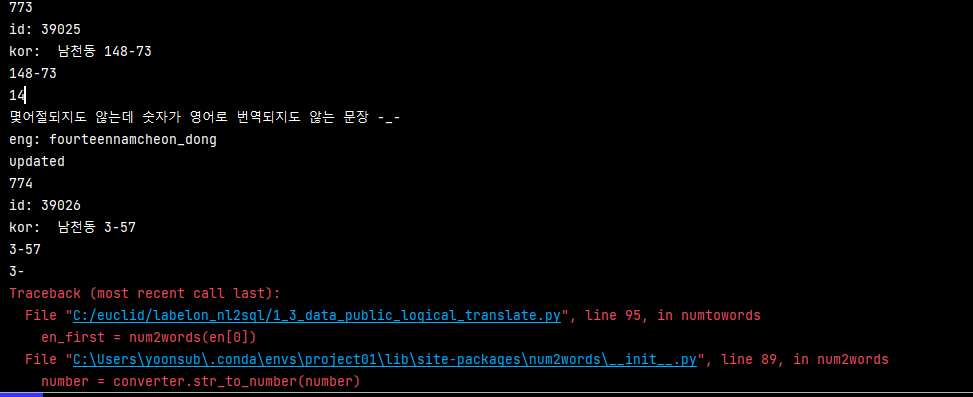

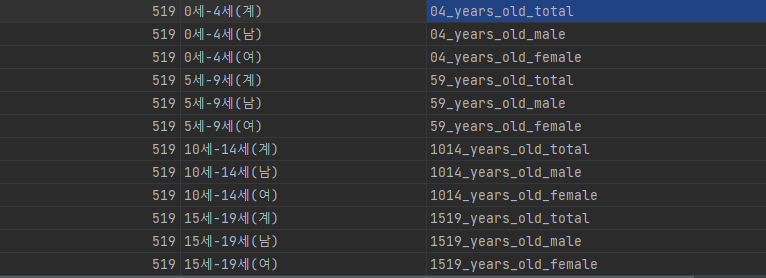
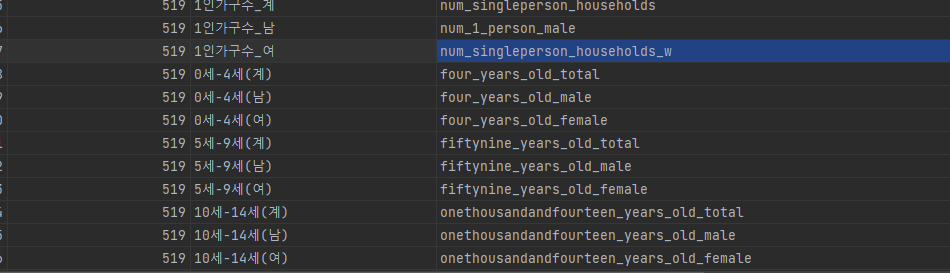

In [12]:
from datetime import datetime

text3 = '2022-08-13 is everything is change'
text2 = '2012-09'
text =  text2.split(' ')[0]



In [1]:
# 날짜를 단어로 변경하는 함수 2 
from datetime import datetime

def datetimetowords(en):
    en = en.split(' ')
    try:
      en_first = en[0]
      if en_first.count('-') == 2: # 2020-08 가운데 바가 1개, 2020-08-18 가운데바가 2개를 조건으로 설정
        en_first = datetime.strptime(en_first, '%Y-%m-%d')
        en_first = datetime.strftime(en_first, '%A %B %d %Y')
      else:
        en_first = datetime.strptime(en_first, '%Y-%m')
        en_first = datetime.strftime(en_first, '%A %B %Y')
    except:
      en = " ".join(en)
      return en
    else:
      en_first = en_first.split(' ')[1:]
      en_first = " ".join(en_first)
      en_late = en[1:]
      en_late = " ".join(en_late)
      en = en_first + " " + en_late
      en = re.sub('[-=+,&#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·;_{}]', '', en)  # 정규식 사용 특수문자 제거
      print("맨앞단의 글자는 날짜형식입니다.")
      return en
    
    
print(datetimetowords("2020-10-31 안녕"))
print(datetimetowords("2020-10 안녕"))
print(datetimetowords("220-10 안녕"))



NameError: name 're' is not defined

In [ ]:
# 숫자 전처리 -2 

In [17]:
#1-3 개선  컬럼용 
delete_words = [' that ' , ' with ' , ' amount ' , ' about ', ' and ' , ' the ' , ' as ',' of ' , 
                ' by ' , ' on ' , ' for ' , ' and ' , ' an ' ,' at ' ]

with open("dict_data.pkl", 'rb') as f:
    dict_refine_words = pickle.load(f)

for data in select_data : 
    id_ = data[0] # 'id' 에러남 , 튜플 슬라이스는 정수만 가능 
    print(f'id : {id_}')
    kor = data[1].replace('_' ,' ')
    print(f'kor : {kor}')
    result = translator.translate(kor, dest='en')
    logical_eng = result.text
    
    ### 컬럼용 전처리 start ###
    logical_eng = datetimetowords(logical_eng) # 먼저 맨앞단 날짜를 영어단어로 변경 , datatimetowords 함수 
    logical_eng = numtowords(logical_eng) # 먼저 맨앞단 숫자를 영어단어로 변경 , numtowords 함수 
    ### 컬럼용 전처리 end ###
    
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    logical_eng = logical_eng.lower() # 대문자 -> 소문자 변경 
    logical_eng = logical_eng.replace('-' ,'') # seo-gu ->seogu 변경    
    
    # 중복제거 
    logical_eng = logical_eng.split(' ')
    logical_eng = list(OrderedDict.fromkeys(logical_eng))
    logical_eng = " ".join(logical_eng)


    #특정단어 혹은 전치사 삭제     
    for word in delete_words : 
        logical_eng = logical_eng.replace(word , " ")               
       
    
    logical_eng = re.sub('[-=+,&#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·;_{}]', '', logical_eng) # 정규식 사용 특수문자 제거           
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    

    # 회사명 약어 변경
    for j in dict_refine_words : 
        logical_eng = logical_eng.replace(j , dict_refine_words[j])       
    
     # 글자수 SQL 제약 확인 
    logical_eng = logical_eng.upper()  # 대문자로 모두 변경 
    if len(logical_eng) >= 50 : 
        logical_eng = logical_eng.split(' ')[1:9]        
        logical_eng = " ".join(logical_eng)
        
        if len(logical_eng) >= 50 : 
            logical_eng = logical_eng.split(' ')[2:8]        
            logical_eng = " ".join(logical_eng)    
    else :
        logical_eng=logical_eng      
      
    
    
    # 공백을 언더바로 변환 전처리   
    logical_eng = logical_eng.replace("\u200B", "") # ZWSP 유니코드삭제 
    logical_eng = logical_eng.replace('    ', '')
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    logical_eng = logical_eng.replace('   ', '_') # 공백을 언더바로 변환 
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    logical_eng = logical_eng.replace('  ', '_') # 공백을 언더바로 변환 
    logical_eng = logical_eng.strip() # 양쪽 공백제거 
    logical_eng = logical_eng.replace(' ', '_') # 공백을 언더바로 변환      
    
   
    
    
    print(f'eng : {logical_eng}')
    update_sql = f"update data_basic_info set data_key = '{logical_eng}' where id='{id_}'"
    cur.execute(update_sql)
    conn.commit() # 마리아 test db에서 만 넣고 반드시 tdb사용할땐 지울것 !!!
  


id : 1
kor : 100년 미래교육보고서 
맨앞 글자가 숫자입니다. :  onehundred Years Future Education Report
eng : ONEHUNDRED_YEARS_FUTURE_EDU
id : 2
kor : 2100-01-01 환경보고
맨앞단은 글자는 날짜형식입니다.
eng : JANUARY_01_2100_EVM
id : 3
kor : 2010-01
맨앞단은 글자는 날짜형식입니다.
eng : JANUARY_2010
id : 4
kor : 2위 대회
eng : 2ND_PLACE
id : 12
kor : 전라남도교육청 전라남도고흥교육지원청 폐지학교 현황
eng : JBE_GOHEUNG_ABOLISHED_SCHOOLS
id : 4001
kor : 대전광역시교육청 공익법인현황
eng : DJE_PUBLIC_INTEREST
id : 4002
kor : 대전광역시교육청 학원 및 교습소 등록 현황
eng : DJE_REG
id : 4003
kor : 대전광역시교육청 다문화교육 정책학교 현황
eng : DJE_MULTICULTURAL_PO_SCHOOLS
id : 4004
kor : 부산광역시교육청 유치원 운영 형태
eng : PEN_KINDERGARTEN_OPR_FORM
id : 4006
kor : 대구광역시 서구 비원도서관 대출순위
eng : BIWON_LIBRARY_LOAN_RANKINGS_IN_SEOGU_DAEGU
id : 4007
kor : 대구광역시 서구 서구영어도서관 대출순위
eng : SEOGU_ENGLISH_LIBRARY_LOAN_RANKING_IN_SEOGU_DAEGU
id : 4008
kor : 대구광역시 서구 원고개도서관 대출순위


KeyboardInterrupt: 

In [7]:
# csv 파일 전처리 1-2 파일참조 

file01 = '경기도 안양시_안양시립도서관 폐기자료_20211210.csv'
file02 = '경기도 안양시_안양시립도서관 폐기자료_2021_10_12_3_4_5.csv'

In [8]:
splited_name = file02.split('.')[0].split('_')
extn = file02.split('.')[-1]

print(splited_name,extn)

name = ''
for i in range(0, len(splited_name)-1): # -1이 뒤에 숫자를 제외한다. 언더바가 2개이상이라면 의미가 없다. ..; 
    name += f'_{splited_name[i]}' if name != '' else f'{splited_name[i]}'

print(name)
# 결론 _20221021 , _1021 형태의 언더바가 한개면 전처리가 깔끔하게 되나 그 이상은 안된다....새로운 방법이 필요 

['경기도 안양시', '안양시립도서관 폐기자료', '2021', '10', '12', '3', '4', '5'] csv
경기도 안양시_안양시립도서관 폐기자료_2021_10_12_3_4


In [9]:
splited_name = file02.split('.')[0].split('_')
extn = file02.split('.')[-1]

print(splited_name,extn)

name = ''
for i in range(0, len(splited_name)): 
    print(splited_name[i])  
    if splited_name[i].isnumeric() == True : 
        splited_name[i] = ''
        print(splited_name[i])
    
    
    name += f'_{splited_name[i]}' if name != '' else f'{splited_name[i]}'
    
    
    
name 

['경기도 안양시', '안양시립도서관 폐기자료', '2021', '10', '12', '3', '4', '5'] csv
경기도 안양시
안양시립도서관 폐기자료
2021

10

12

3

4

5



'경기도 안양시_안양시립도서관 폐기자료______'

In [10]:
# 1차 완성 코드가 좀 길고 지저분한느낌. 개선할방법? 


splited_name = file02.split('.')[0].split('_')
extn = file02.split('.')[-1]
print(splited_name,extn)


name = ''
count = 0
for i in range(0, len(splited_name)):  # split('_') 분리하였을때 숫자확인     
    if splited_name[i].isnumeric() == True : 
        count += 1     
for i in range(0, len(splited_name ) - count):  # 숫자 언더바만큼 제외                       
    name += f'_{splited_name[i]}' if name != '' else f'{splited_name[i]}'   
        
name 

['경기도 안양시', '안양시립도서관 폐기자료', '2021', '10', '12', '3', '4', '5'] csv


'경기도 안양시_안양시립도서관 폐기자료'

In [51]:
test = "research INFO SUB life cycle civil  PENS the total NUM approvals during tenure"
test = test.split(' ')
test01 = test[0:3]
test02 = test[:-1]

test02

['research',
 'INFO',
 'SUB',
 'life',
 'cycle',
 'civil',
 '',
 'PENS',
 'the',
 'total',
 'NUM',
 'approvals',
 'during']

In [82]:
test03 = 'research INFO SUB life cycle civil PENS the total NUM approvals during tenure'
test03 = re.sub(' +', ' ', test03)  # 다중공백을 변환
test03

test03 = test03.split(" ")
test03[-9:]
test

['research',
 'INFO',
 'SUB',
 'life',
 'cycle',
 'civil',
 '',
 'PENS',
 'the',
 'total',
 'NUM',
 'approvals',
 'during',
 'tenure']

In [87]:
test03 = { 'test' : 'where in where select where' }
print(test03['where'] )

KeyError: 'where'